Perte:  337.57504
(a, b) : ( 7.3 ,  5.5 )
Perte:  0.14800024
(a, b) : ( 2.0751345 ,  1.1611316 )


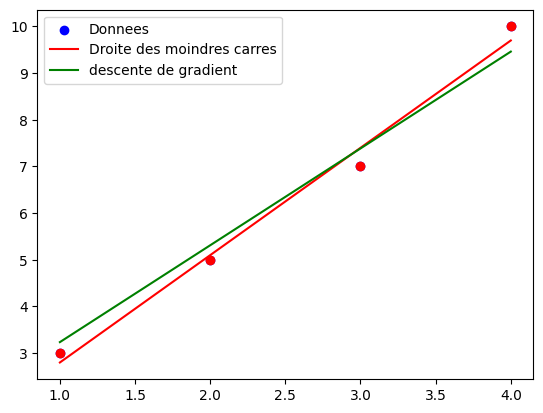

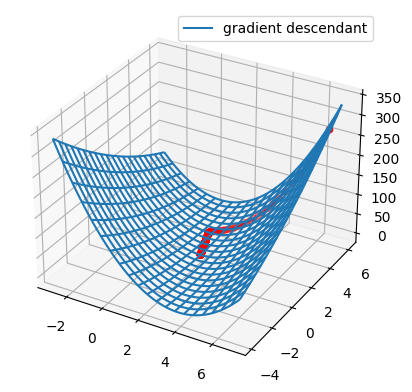

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
class Model(object):
    def __init__(self, a, b):
        self.a = a
        self.b = b
    def __call__(self, x):
        return self.a * x + self.b
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:
        t.watch([model.a, model.b])
        current_loss = perte(model(inputs), outputs)
    da, db = t.gradient(current_loss, [model.a, model.b])
    model.a = tf.add(model.a,tf.constant(-learning_rate * da))
    model.b = tf.add(model.b,tf.constant(-learning_rate * db))


model = Model(tf.Variable(3.0),tf.Variable(5.0))
assert model(3.0).numpy() == 14.0
def perte(predicted_y, target_y):
    return tf.reduce_mean(tf.square(predicted_y - target_y))

a_mc2 = tf.Variable(2.3)
b_mc2 = tf.Variable(0.5)
model_ref = Model(a_mc2,b_mc2)
x = np.array([1,2,3,4],np.float32)
y = np.array([3,5,7,10],np.float32)
NUM_EXAMPLES = x.shape
learning_rate = 0.005
model = Model(tf.Variable(7.3),tf.Variable(5.5))
print('Perte: ', perte(model(x), y).numpy())
print('(a, b) : (', model.a.numpy(),', ',model.b.numpy(),')')
chemin = list()
epochs = range(1000)
for epoch in epochs:
    train(model, x, y, learning_rate)
    chemin.append([model.a.numpy(), model.b.numpy(),perte(model(x), y)])
print('Perte: ', perte(model(x), y).numpy())
print('(a, b) : (', model.a.numpy(),', ',model.b.numpy(),')')
aa = np.arange(-5 + model.a.numpy(), 5 + model.a.numpy(), 0.05)
bb = np.arange(-5 + model.b.numpy(), 5 + model.b.numpy(), 0.05)
a_, b_ = np.meshgrid(aa, bb)
zz = np.zeros(a_.shape,np.float32)
for idx in range(x.shape[0]):
    zz = zz + (a_ * x[idx] + b_ - y[idx]) ** 2
plt.figure(1)
plt.scatter(x, y, c='b',label='Donnees')
plt.plot(x, model_ref(x), c='r',label='Droite des moindres carres')
plt.plot(x, model( x) , c='g',label='descente de gradient')
plt.scatter(x, y, c='r')
plt.legend()
fig = plt.figure(2)
ax = fig.add_subplot(111, projection='3d')  # Changed line

surf = ax.plot_wireframe(a_, b_, zz/x.shape[0],
                       rstride=10, cstride=10)
ax.plot([x[0] for x in chemin], [x[1] for x in chemin], [x[2] for x in chemin], label='gradient descendant')
ax.scatter([x[0] for x in chemin], [x[1] for x in chemin], [x[2] for x in chemin],c='r')
ax.legend()
plt.show()